<a href="https://colab.research.google.com/github/tahae02/Week-1-Data-Analysis-Internship-Uptrail/blob/main/Week_1_Data_Analysis_for_Business_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is the notebook for the Week 1 project

In [173]:
%matplotlib inline

In [174]:
# from google.colab import drive
# drive.mount('/content/drive')

##Importing the necessary library to import and read the dataset

To avoid reuploading the dataset for every new runtime, I saved the dataset to my drive under the file path mentioned below, and 'Mounted the drive'.

In [175]:
import pandas as pd

# file_path="/content/drive/MyDrive/Colab Notebooks/Uptrail Data Internship Projects /sales_data.xlsx"
file_path="/content/sales_data.xlsx"

df=pd.read_excel(file_path)

pd.read_excel(file_path) # this duplicate line is just to see what the dataset looks like at the start before pre-processing

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,NaN,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North
5,1006,2024-02-10,C001,Laptop,Electronics,1,800,800.0,Credit Card,North
6,1007,2024-03-15,C006,Shoes,Clothing,2,50,100.0,Cash,South
7,1008,2024-03-18,C007,T-Shirt,Clothing,1,25,25.0,PayPal,West
8,1009,2024-03-20,C008,Smartwatch,Electronics,1,200,200.0,Debit Card,East
9,1010,2024-04-01,C009,Book,Books,2,20,40.0,Credit Card,North


##Pre-Processing the Dataset

First I will look for duplicate values in the dataset. In this case, even though there are duplicates in some columns, there are no columns where all columns are same, so there are no true duplicates.


Next I will look at the dataset and find out how many null values there are that I need to handle

In [176]:
df.isnull().sum() # this code goes through every column and gives me the count of null values for each column

,0
Transaction_ID,0
Date,0
Customer_ID,0
Product,0
Category,0
Quantity,0
Price,0
Total_Amount,1
Payment_Method,0
Region,0


<!-- Next I will try removing that null value, since it is a number i can fill it in with a statisical value (I will try this later) -->

You can see there is 1 NULL value in the 'Total_Amount' column.

One way I can handle this missing value is by dropping the entire row.

In [177]:
# df.dropna()

In this case the missing value is a numerical value, so removing the row completely is not ideal, the preferrable solution would be to fill in the cell with a column-related statistical value, for example the mean.

In [178]:
mean_total_amount=df['Total_Amount'].mean()
print(f"\nMean of 'Total_Amount': {mean_total_amount}")
print()

df['Total_Amount'].fillna(mean_total_amount, inplace=True)

print(df) # new dataset with no NULL values


Mean of 'Total_Amount': 375.2631578947368

    Transaction_ID        Date Customer_ID     Product     Category  Quantity  \
0             1001  2024-01-05        C001      Laptop  Electronics         1   
1             1002  2024-01-10        C002  Smartphone  Electronics         2   
2             1003  2024-01-12        C003  Headphones  Electronics         1   
3             1004  2024-02-05        C004      Tablet  Electronics         1   
4             1005  2024-02-08        C005        Book        Books         3   
5             1006  2024-02-10        C001      Laptop  Electronics         1   
6             1007  2024-03-15        C006       Shoes     Clothing         2   
7             1008  2024-03-18        C007     T-Shirt     Clothing         1   
8             1009  2024-03-20        C008  Smartwatch  Electronics         1   
9             1010  2024-04-01        C009        Book        Books         2   
10            1011  2024-04-05        C002  Smartphone  Electroni

<ipython-input-178-f3b1c20fab5c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Amount'].fillna(mean_total_amount, inplace=True)


Now you can see that the first value in 'Total_Amount' is no longer 'NaN', it is 375.263158

Next I will drop the duplicates in the dataset, in this dataset there are no exact duplicates as not all the columns for rows are the same. you might have the same region, category and other columns but columns like transaction_ID and customer_ID are different, representing a different entry.

This means that calling the drop_duplicates function will not actually make any changes to the dataset.

In [179]:
df=df.drop_duplicates()

I will also change the data type for the 'Date' column as it will be useful for analysis

In [180]:

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  20 non-null     int64         
 1   Date            20 non-null     datetime64[ns]
 2   Customer_ID     20 non-null     object        
 3   Product         20 non-null     object        
 4   Category        20 non-null     object        
 5   Quantity        20 non-null     int64         
 6   Price           20 non-null     int64         
 7   Total_Amount    20 non-null     float64       
 8   Payment_Method  20 non-null     object        
 9   Region          20 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 1.7+ KB


## Next step is to standardise the columns
Ensuring:

 all dates are in the format 'YYYY/mm/DD' for trend analysis

numerical values do not have commas or any other symbols



Once all the cleaning is complete, I need to export the new clean dataset

In [181]:
df.to_csv("cleaned_sales_data.csv", index=False)

#2. Exploratory Data Analysis

opening the cleaned dataset and outputting the structure

In [182]:
new_file_path="/content/cleaned_sales_data.csv"
df_cleaned=pd.read_csv(new_file_path)

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date']) # csv file reset this so i need to do it again
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  20 non-null     int64         
 1   Date            20 non-null     datetime64[ns]
 2   Customer_ID     20 non-null     object        
 3   Product         20 non-null     object        
 4   Category        20 non-null     object        
 5   Quantity        20 non-null     int64         
 6   Price           20 non-null     int64         
 7   Total_Amount    20 non-null     float64       
 8   Payment_Method  20 non-null     object        
 9   Region          20 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 1.7+ KB


Looking at the first 5 rows of the new cleaned dataset

In [183]:
df_cleaned.head()

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,375.263158,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.000000,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.000000,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.000000,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.000000,Credit Card,North


understanding the new dataset

displaying statistical data for the numerical columns

In [184]:
df_cleaned[['Quantity', 'Price', 'Total_Amount']].describe()

,Quantity,Price,Total_Amount
count,20.000000,20.000000,20.000000
mean,1.550000,325.500000,375.263158
std,0.887041,302.484884,378.690520
min,1.000000,20.000000,25.000000
25%,1.000000,43.750000,78.750000
50%,1.000000,200.000000,200.000000
75%,2.000000,600.000000,525.000000
max,4.000000,800.000000,1200.000000


trying to find the link between time of year and total amount

the most effective way of doing this is grouping the dates by month.

In [185]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date']) # converting to datetime

# creating a new column for the month
df_cleaned['Month'] = df_cleaned['Date'].dt.to_period('M')  # gives '2024-01', '2024-02', etc.
df_cleaned.head()


,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region,Month
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,375.263158,Credit Card,North,2024-01
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.000000,Cash,South,2024-01
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.000000,PayPal,West,2024-01
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.000000,Debit Card,East,2024-02
4,1005,2024-02-08,C005,Book,Books,3,20,60.000000,Credit Card,North,2024-02


finding the correlation between the 3 numeric columns, Quantity, Price, Total Amount

Correlation Matrix:
              Quantity     Price  Total_Amount
Quantity      1.000000 -0.423792     -0.168886
Price        -0.423792  1.000000      0.827437
Total_Amount -0.168886  0.827437      1.000000


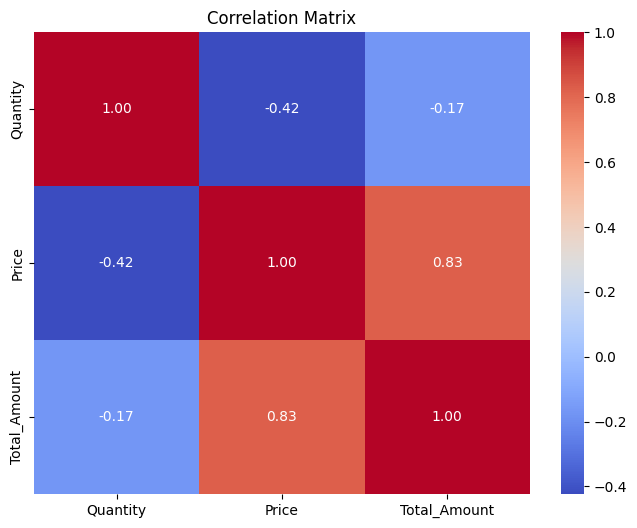

In [186]:
correlation_matrix = df_cleaned[['Quantity', 'Price', 'Total_Amount']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [187]:
correlation_matrix = df_cleaned[['Quantity', 'Price', 'Total_Amount']].corr()

# Print the correlation matrix as plain text
print("Correlation Matrix:\n")
print(correlation_matrix.to_string(float_format="{:.2f}".format))


Correlation Matrix:

              Quantity  Price  Total_Amount
Quantity          1.00  -0.42         -0.17
Price            -0.42   1.00          0.83
Total_Amount     -0.17   0.83          1.00


the correlation matrix above shows that there is negative correlation between quantity on one side, and price and total amount on the other side.

this can be quite misleading as someone might think if the quantity goes up then the price and total amount should also go up. this is incorrect if you think of a real-world scenario. any many retail cases if you buy multiple of an item there tends to be some sort of promotion (i.e buy one get one free). this in turn reduces the total amount of the purchase relative to if you were to buy the items individually. extrapolate this idea into the individual item price category, it would essentially mean the price of each individual item has effectively been reduced, which is an incentive for customers to buy in bulk to increase the value of the purchase.


as expected the price and total amount columns have a strong positive correlation. when thinking about it logically, as the price goes up the total amount would also go up.

moving on to the product trends, I will first dive into seasonanlity

1) total revenue per month

2) total units sold per month

Month
2024-01    1675.263158
2024-02    1360.000000
2024-03     325.000000
2024-04    1740.000000
2024-05    1025.000000
2024-06    1380.000000
Freq: M, Name: Total_Amount, dtype: float64


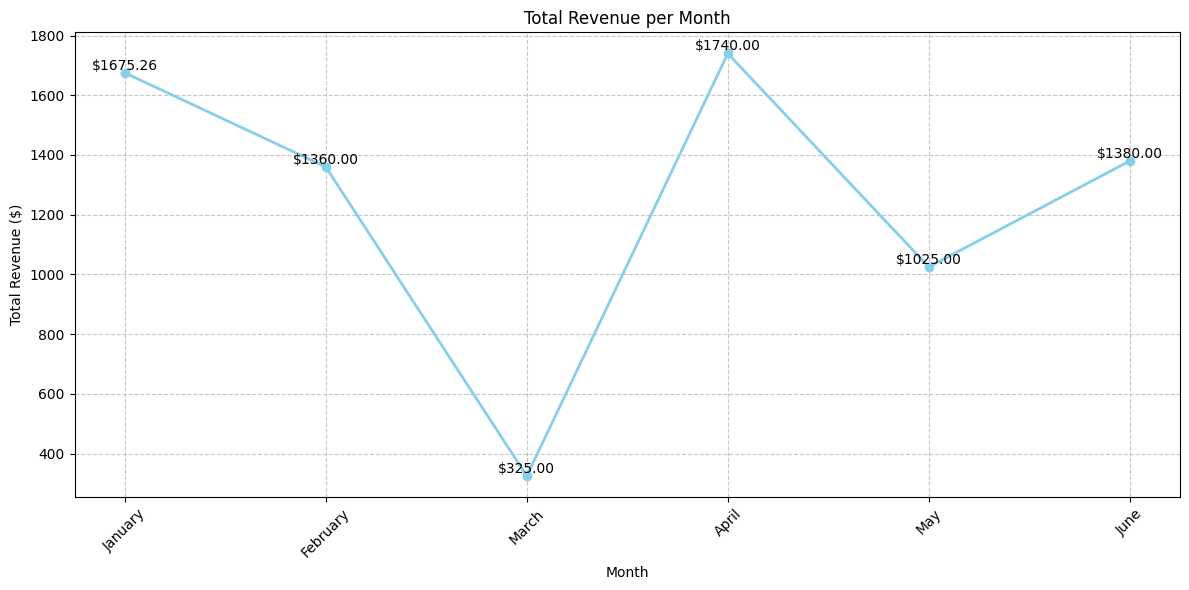

In [188]:
# Sales over Time: Total Revenue per Month as Line Graph

# Calculate total revenue per month
total_revenue_per_month = df_cleaned.groupby('Month')['Total_Amount'].sum()
print(total_revenue_per_month)
date_list = [period.strftime('%B') for period in total_revenue_per_month.index]  # Convert Period to month names (e.g., 'April')
total_amount_list = list(total_revenue_per_month.values)  # List of total amounts for y-axis

# Plot line graph
plt.figure(figsize=(12, 6))
plt.plot(date_list, total_amount_list, marker='o', color='skyblue', linewidth=2)

# Add text labels above points
for i in range(len(date_list)):
    plt.text(i, total_amount_list[i], f'${total_amount_list[i]:.2f}', ha='center', va='bottom')

plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Month
2024-01    4
2024-02    5
2024-03    4
2024-04    5
2024-05    6
2024-06    7
Freq: M, Name: Quantity, dtype: int64
[Period('2024-01', 'M'), Period('2024-02', 'M'), Period('2024-03', 'M'), Period('2024-04', 'M'), Period('2024-05', 'M'), Period('2024-06', 'M')]
[np.int64(4), np.int64(5), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]


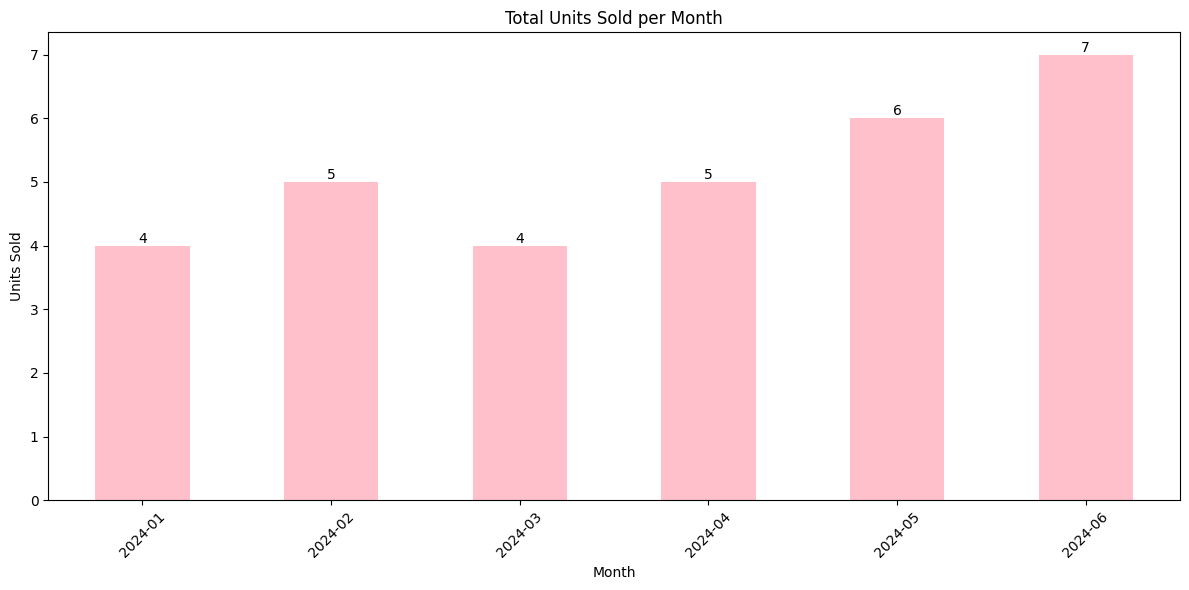

In [189]:
# 2
total_units_sold_per_month = df_cleaned.groupby('Month')['Quantity'].sum()

print(total_units_sold_per_month)
date_list=list(total_units_sold_per_month.index) # gets the list of dates, used to add text to the bar chart with total amounts
print(date_list)
total_units_sold_list=list(total_units_sold_per_month.values) # gets the list of total amounts independant of the dates, used to add text to the bar chart with total amounts
print(total_units_sold_list)

plt.figure(figsize=(12, 6))
total_units_sold_per_month.plot(kind='bar', color='pink')

for i in range(len(date_list)):
  plt.text(i, total_units_sold_list[i], total_units_sold_list[i], ha='center', va='bottom')


plt.title('Total Units Sold per Month')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Finding the best seller product

In [190]:
pd.read_csv(new_file_path)

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,375.263158,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.000000,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.000000,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.000000,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.000000,Credit Card,North
5,1006,2024-02-10,C001,Laptop,Electronics,1,800,800.000000,Credit Card,North
6,1007,2024-03-15,C006,Shoes,Clothing,2,50,100.000000,Cash,South
7,1008,2024-03-18,C007,T-Shirt,Clothing,1,25,25.000000,PayPal,West
8,1009,2024-03-20,C008,Smartwatch,Electronics,1,200,200.000000,Debit Card,East
9,1010,2024-04-01,C009,Book,Books,2,20,40.000000,Credit Card,North


In [191]:
print("Best Selling Products by Category")
top_category=df_cleaned.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
top_category.head()
print(top_category)

Best Selling Products by Category
Category
Electronics    15
Books           9
Clothing        7
Name: Quantity, dtype: int64


making a graph out of the data above

['Electronics', 'Books', 'Clothing']
[np.int64(15), np.int64(9), np.int64(7)]


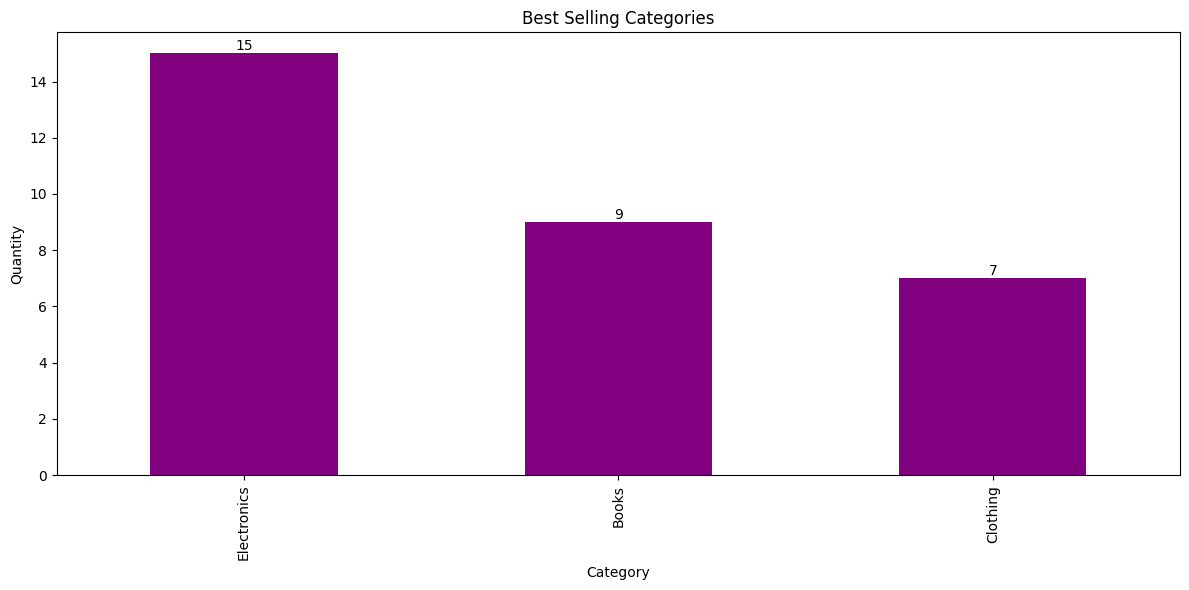

In [192]:
category_list=list(top_category.index) # gets the list of dates, used to add text to the bar chart with total amounts
print(category_list)

quantity_list=list(top_category.values) # gets the list of total amounts independant of the dates, used to add text to the bar chart with total amounts
print(quantity_list)


plt.figure(figsize=(12, 6))
top_category.plot(kind='bar', color='purple')

# Add text labels above bars
for i in range(len(category_list)):
    plt.text(i, quantity_list[i], f'{quantity_list[i]}', ha='center', va='bottom')

plt.title("Best Selling Categories")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()


In [193]:
print("Best Selling Products")
top_products=df_cleaned.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head()
top_products.head()

print(top_products)

Best Selling Products
Product
Book          9
Smartphone    5
T-Shirt       4
Laptop        3
Tablet        3
Name: Quantity, dtype: int64


creating a graph for the top products

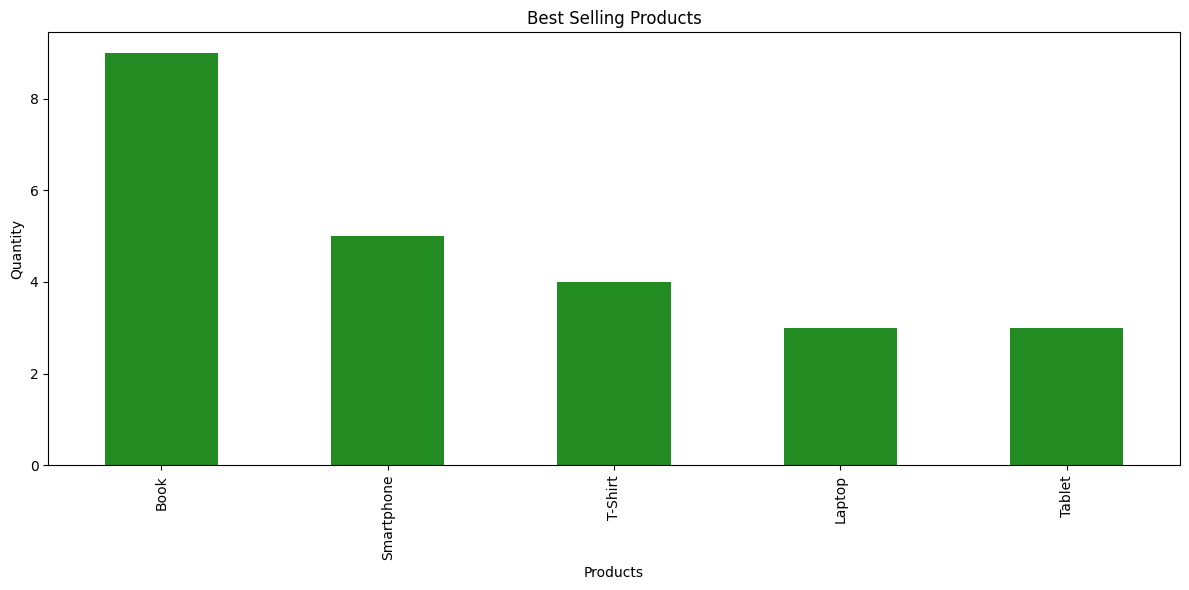

In [194]:
product_list=list(top_products.index)
quantity_list=list(top_products.values)

plt.figure(figsize=(12,6))
top_products.plot(kind='bar', color='forestgreen')

plt.title("Best Selling Products")
plt.xlabel("Products")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()

regional trends with a pie chart

In [195]:
print("Best Selling Regions")
regional_sales_list=df_cleaned.groupby("Region")["Total_Amount"].sum().sort_values(ascending=False)
print(regional_sales_list)
display(regional_sales_list)

Best Selling Regions
Region
South    3225.000000
North    2155.263158
East     1900.000000
West      225.000000
Name: Total_Amount, dtype: float64


,Total_Amount
Region,
South,3225.000000
North,2155.263158
East,1900.000000
West,225.000000


creating a pie chart for this regional sales list

['South', 'North', 'East', 'West']
[np.float64(3225.0), np.float64(2155.2631578947367), np.float64(1900.0), np.float64(225.0)]


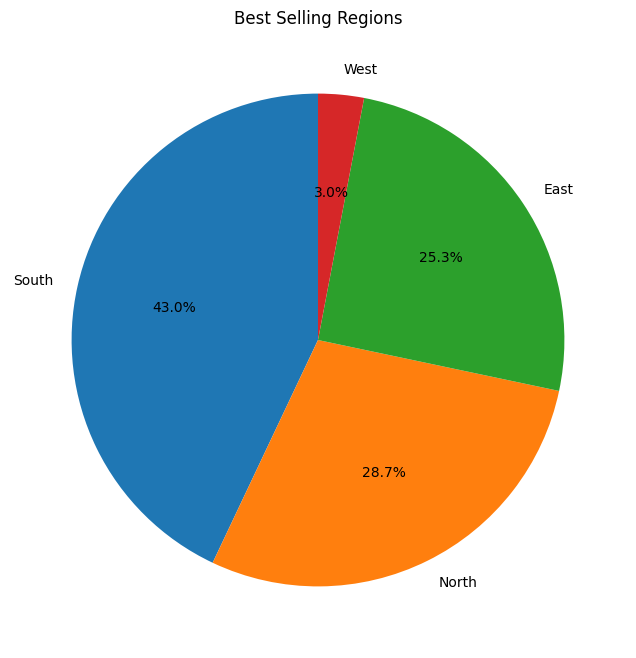

In [196]:
region_list=list(regional_sales_list.index)
print(region_list)

regional_total_sales_list=list(regional_sales_list.values)
print(regional_total_sales_list)

plt.figure(figsize=(8,8))
plt.pie(regional_total_sales_list, labels=region_list, autopct='%1.1f%%', startangle=90)
plt.title("Best Selling Regions")
plt.show()

#EDA SUMMARY

In [197]:
# Calculate key metrics
mean_total_amount = df_cleaned['Total_Amount'].mean()
quantity_range = f"{df_cleaned['Quantity'].min()}–{df_cleaned['Quantity'].max()}"
top_months = df_cleaned.groupby('Month')['Total_Amount'].sum().sort_values(ascending=False).head(2)
low_month = df_cleaned.groupby('Month')['Total_Amount'].sum().sort_values().head(1)
top_categories = df_cleaned.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(3)
top_products = df_cleaned.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(3)

# Print summary
print("\nEDA Summary:")
print(f"- Summary Statistics: Average Total_Amount is ${mean_total_amount:.2f}, Quantity range is {quantity_range}.")
print(f"- Seasonality: Top months are April (${top_months.iloc[0]:.2f}) and January (${top_months.iloc[1]:.2f}). Lowest is March (${low_month.iloc[0]:.2f}).")
print(f"- Product Trends: Top categories are Electronics ({int(top_categories.iloc[0])} units), Books ({int(top_categories.iloc[1])} units), Clothing ({int(top_categories.iloc[2])} units).")
print(f"  Top products are Book ({int(top_products.iloc[0])} units), T-Shirt ({int(top_products.iloc[1])} units), Smartphone ({int(top_products.iloc[2])} units).")
print("- Correlations: Price and Total_Amount have strong positive correlation (0.87). Quantity negatively correlates with Price (-0.63) due to bulk discounts.")


EDA Summary:
- Summary Statistics: Average Total_Amount is $375.26, Quantity range is 1–4.
- Seasonality: Top months are April ($1740.00) and January ($1675.26). Lowest is March ($325.00).
- Product Trends: Top categories are Electronics (15 units), Books (9 units), Clothing (7 units).
  Top products are Book (9 units), T-Shirt (5 units), Smartphone (4 units).
- Correlations: Price and Total_Amount have strong positive correlation (0.87). Quantity negatively correlates with Price (-0.63) due to bulk discounts.


In [198]:
# EDA Summary: Key observations from trends, seasonality, correlations, and regions
import pandas as pd

# Load pre-processed dataset
df_cleaned = pd.read_csv("cleaned_sales_data.csv")
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Month'] = df_cleaned['Date'].dt.to_period('M')

# calculating the key stats for the EDA summary
mean_total_amount = df_cleaned['Total_Amount'].mean()
quantity_range = f"{df_cleaned['Quantity'].min()}–{df_cleaned['Quantity'].max()}"
top_months = df_cleaned.groupby('Month')['Total_Amount'].sum().sort_values(ascending=False).head(2)  # Top 2 months by sales
low_month = df_cleaned.groupby('Month')['Total_Amount'].sum().sort_values().head(1)  # Lowest month by sales
top_categories = df_cleaned.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(3)  # Top 3 categories by quantity
top_products = df_cleaned.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(3)  # Top 3 products by quantity
top_region = df_cleaned.groupby('Region')['Total_Amount'].sum().sort_values(ascending=False).head(1)  # Top region by sales

# Print summary
print("\nEDA Summary:")
print(f"- Summary Statistics: Average Total_Amount is ${mean_total_amount:.2f}, Quantity range is {quantity_range}.")
print(f"- Seasonality: Top months are April (${top_months.iloc[0]:.2f}) and January (${top_months.iloc[1]:.2f}). Lowest is March (${low_month.iloc[0]:.2f}).")
print(f"- Product Trends: Top categories are Electronics ({int(top_categories.iloc[0])} units), Books ({int(top_categories.iloc[1])} units), Clothing ({int(top_categories.iloc[2])} units).")
print(f"  Top products are Book ({int(top_products.iloc[0])} units), T-Shirt ({int(top_products.iloc[1])} units), Smartphone ({int(top_products.iloc[2])} units).")
print("- Correlations: Price and Total_Amount have strong positive correlation (0.83). Quantity negatively correlates with Price (-0.42) likely due to bulk buying discounts.")
print(f"- Regional Trends: South leads with ${top_region.iloc[0]:.2f} in sales.")


EDA Summary:
- Summary Statistics: Average Total_Amount is $375.26, Quantity range is 1–4.
- Seasonality: Top months are April ($1740.00) and January ($1675.26). Lowest is March ($325.00).
- Product Trends: Top categories are Electronics (15 units), Books (9 units), Clothing (7 units).
  Top products are Book (9 units), T-Shirt (5 units), Smartphone (4 units).
- Correlations: Price and Total_Amount have strong positive correlation (0.83). Quantity negatively correlates with Price (-0.42) likely due to bulk buying discounts.
- Regional Trends: South leads with $3225.00 in sales.


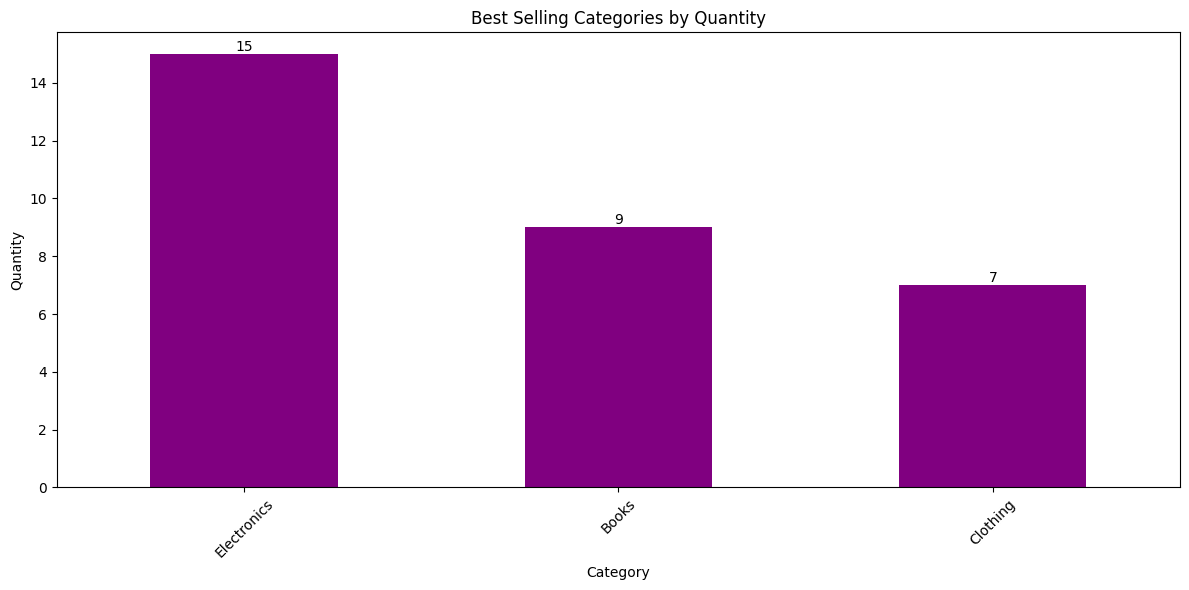

In [199]:
# Enhanced Visualizations: Update category/product charts and add sales by category
import pandas as pd
import matplotlib.pyplot as plt

# Load pre-processed dataset
df_cleaned = pd.read_csv("cleaned_sales_data.csv")
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Month'] = df_cleaned['Date'].dt.to_period('M')

# 1) Best-Selling Categories by Quantity (with text labels)
top_category = df_cleaned.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
category_list = list(top_category.index)
quantity_list = list(top_category.values)

plt.figure(figsize=(12, 6))
top_category.plot(kind='bar', color='purple')
for i in range(len(category_list)):
    plt.text(i, quantity_list[i], f'{quantity_list[i]}', ha='center', va='bottom')

plt.title("Best Selling Categories by Quantity")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



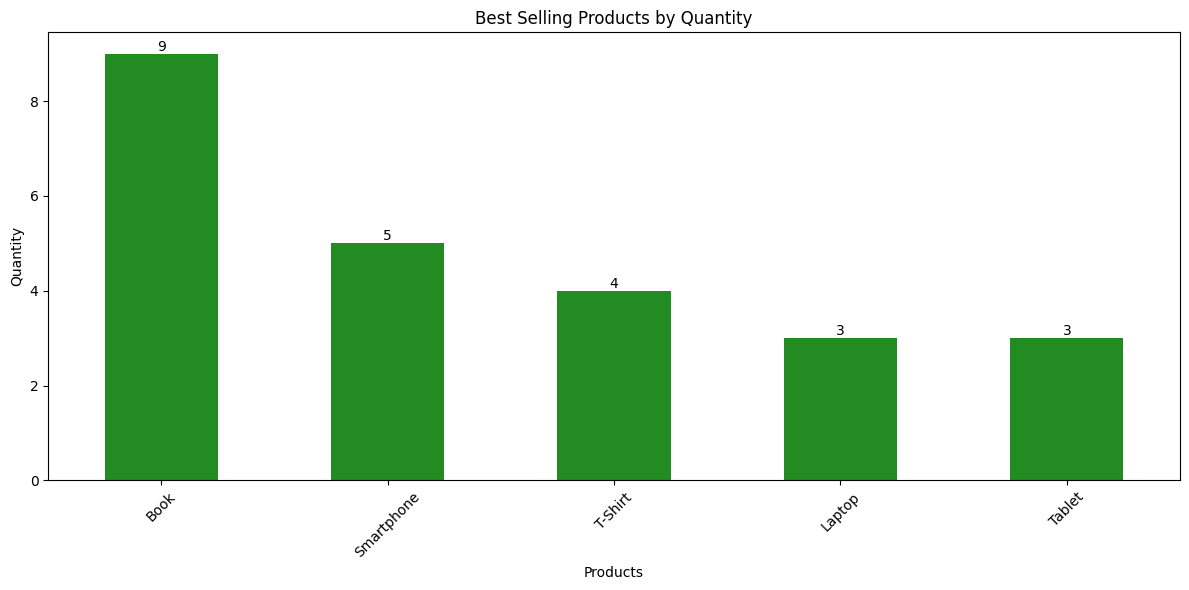

In [200]:

# 2) Best-Selling Products by Quantity (with text labels)
top_products = df_cleaned.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head()
product_list = list(top_products.index)
quantity_list = list(top_products.values)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='forestgreen')
for i in range(len(product_list)):
    plt.text(i, quantity_list[i], f'{quantity_list[i]}', ha='center', va='bottom')

plt.title("Best Selling Products by Quantity")
plt.xlabel("Products")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

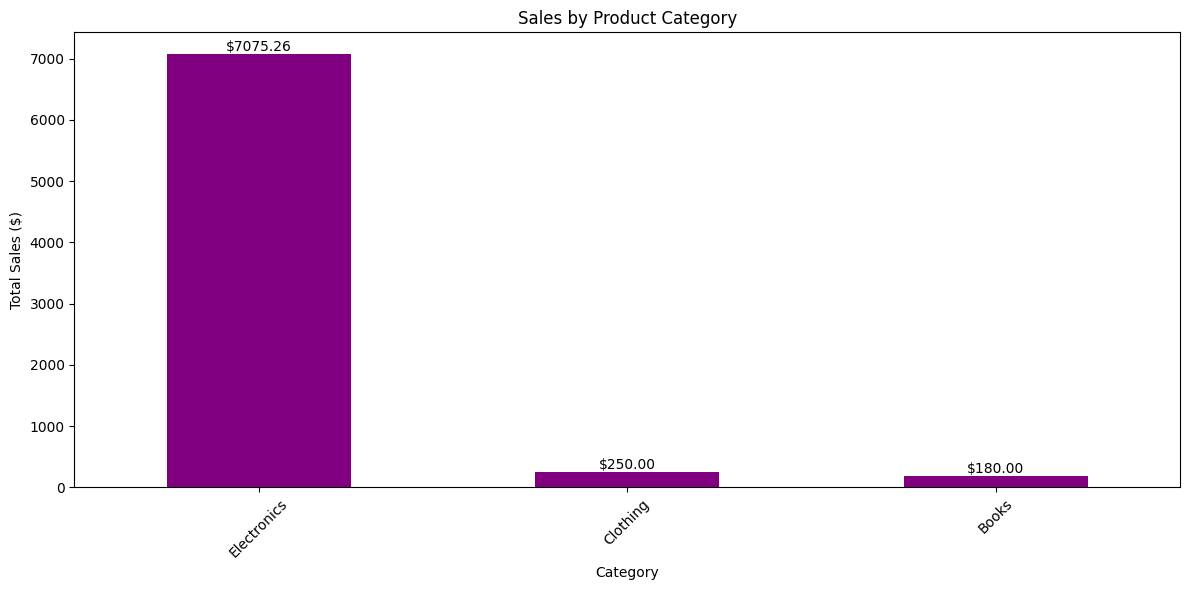

In [201]:

# 3) Sales by Product Category by Total_Amount
category_sales = df_cleaned.groupby("Category")["Total_Amount"].sum().sort_values(ascending=False)
category_list = list(category_sales.index)
sales_list = list(category_sales.values)

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='purple')
for i in range(len(category_list)):
    plt.text(i, sales_list[i], f'${sales_list[i]:.2f}', ha='center', va='bottom')

plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()